In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=pd.read_csv("RTA Dataset.csv")
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [152]:
#df.info()
print(df.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [144]:
# Identify numerical columns and replace missing values with the mean
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Identify categorical columns and replace missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)




In [148]:
# Ensure Time column is of type string
df['Time'] = df['Time'].astype(str)
# Convert Time to seconds since midnight
def time_to_seconds(time_str):
    try:
        parts = time_str.split(':')
        return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])
    except:
        return None  # Return None if there's an error in conversion
    

df['Time'] = df['Time'].apply(time_to_seconds)

# Change the type of the Time column to int64, handling any potential None values
df['Time'] = df['Time'].fillna(0).astype('int64')


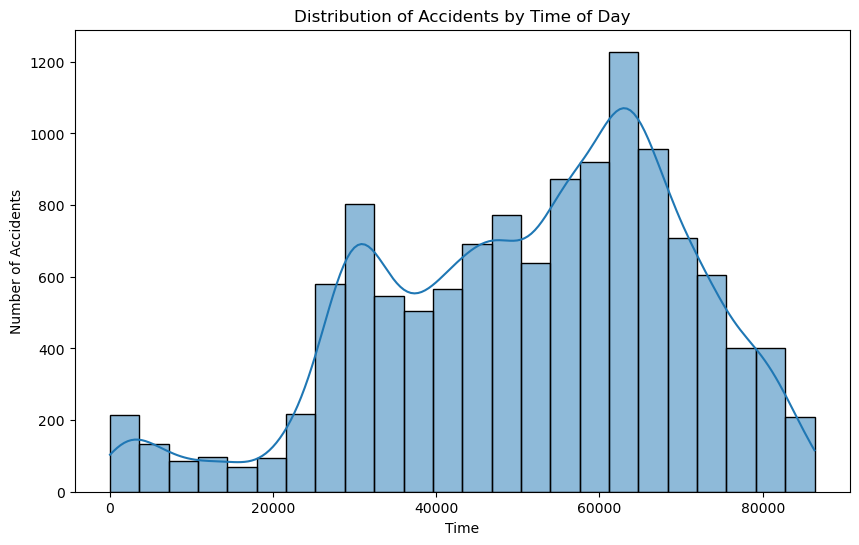

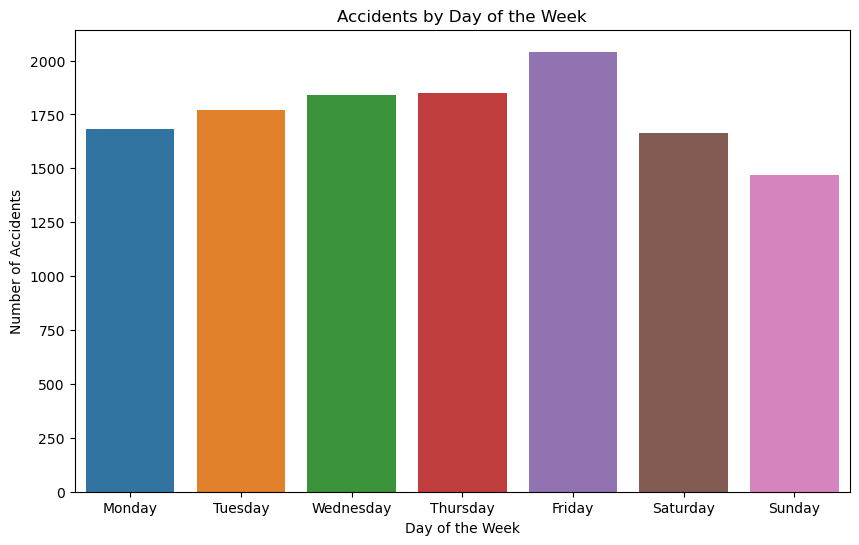

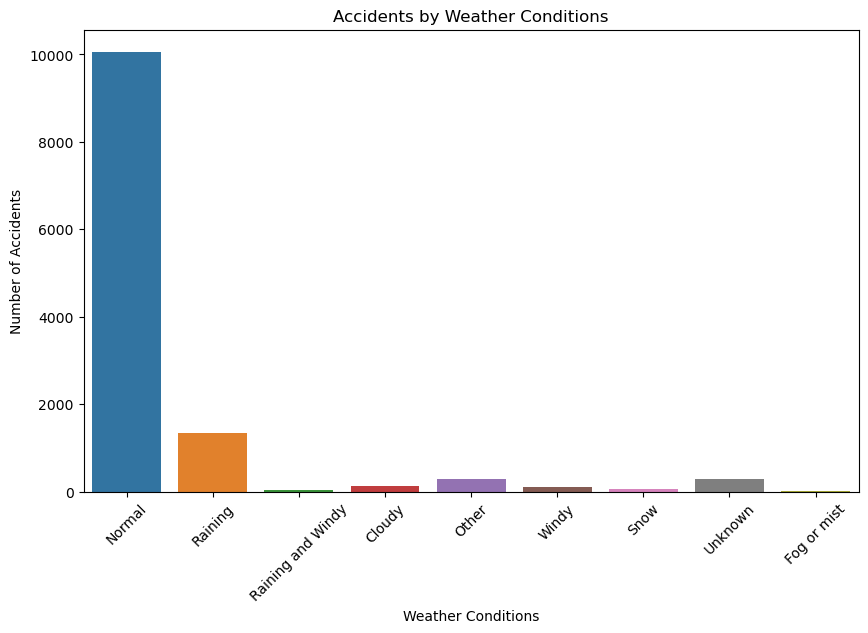

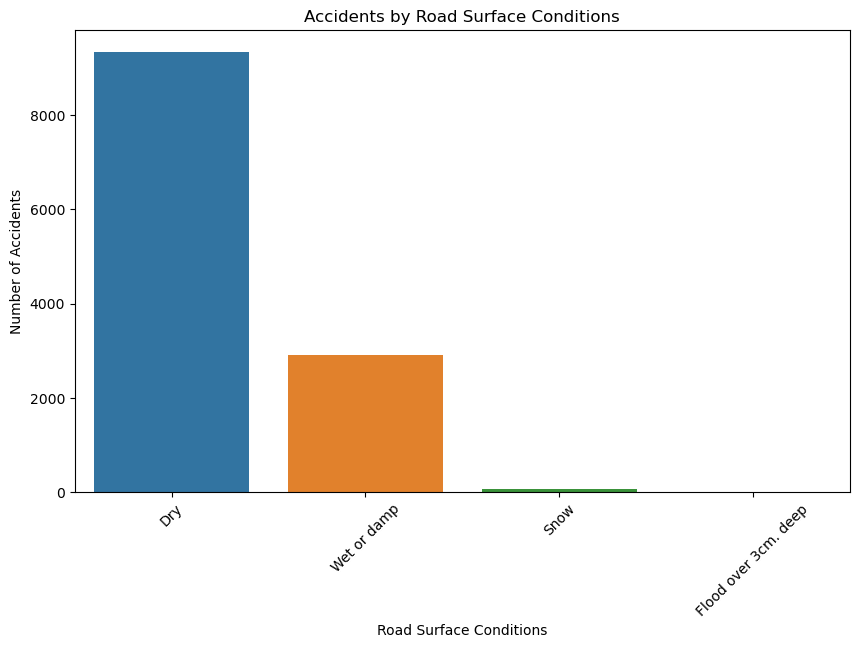

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of accidents by time of day
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=24, kde=True)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=df)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accidents by road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_surface_conditions', data=df)
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


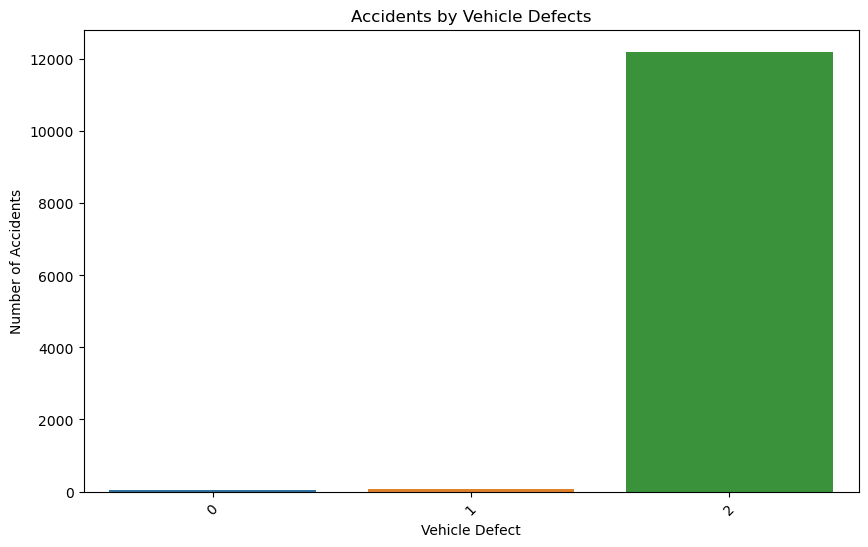

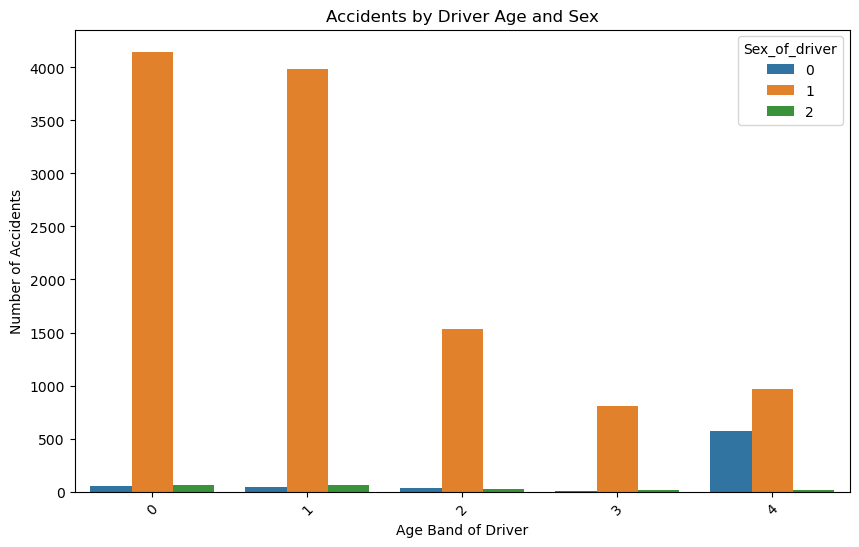

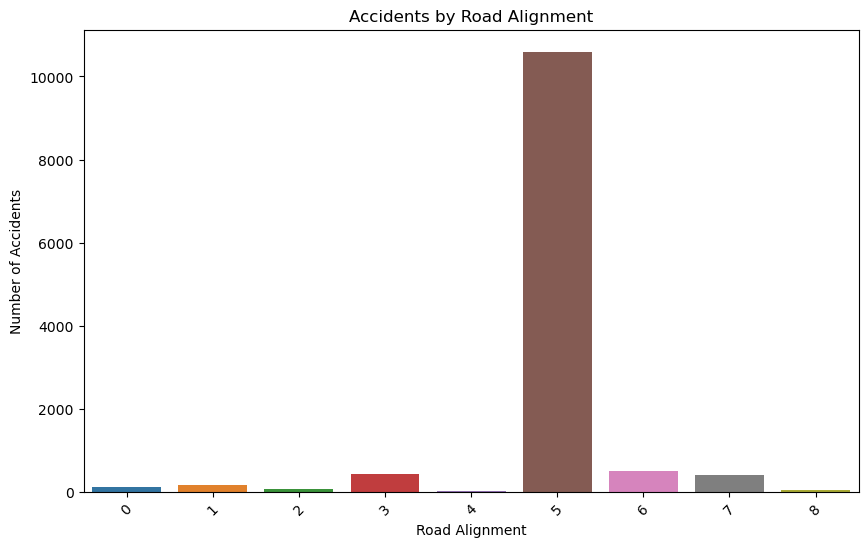

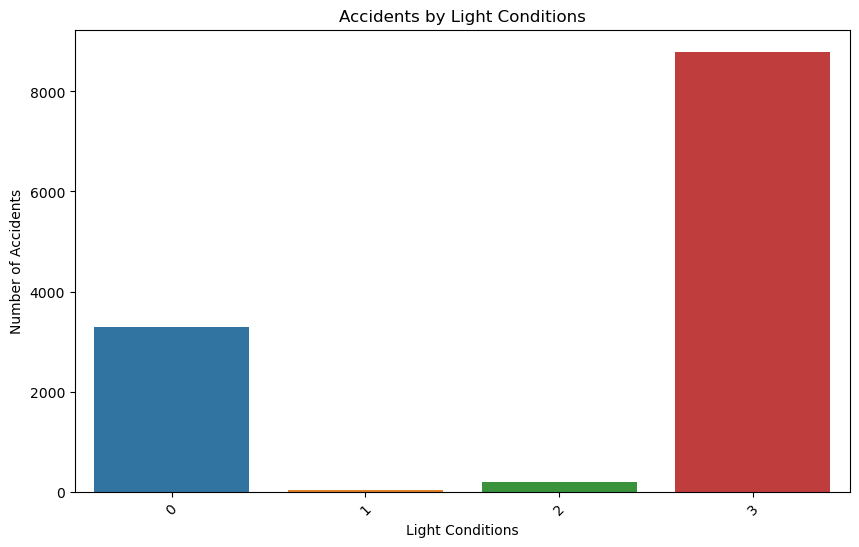

In [100]:
# Vehicle conditions and accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Defect_of_vehicle', data=df)
plt.title('Accidents by Vehicle Defects')
plt.xlabel('Vehicle Defect')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Driver factors and accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', data=df, hue='Sex_of_driver')
plt.title('Accidents by Driver Age and Sex')
plt.xlabel('Age Band of Driver')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Road and environmental factors
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_allignment', data=df)
plt.title('Accidents by Road Alignment')
plt.xlabel('Road Alignment')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Light_conditions', data=df)
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


df.columns

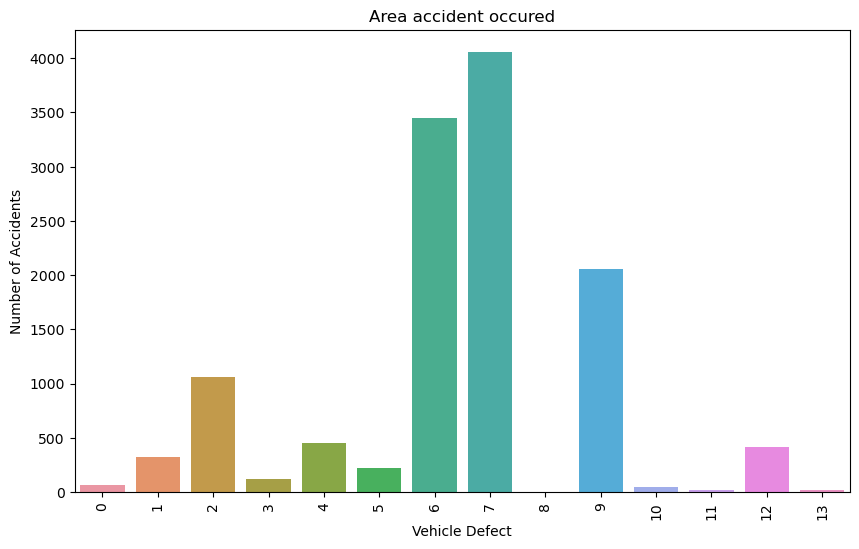

In [101]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Area_accident_occured', data=df)
plt.title('Area accident occured')
plt.xlabel('Vehicle Defect')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


In [151]:

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


# Define features and target
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']


In [153]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [155]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [156]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8417207792207793
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.86      0.03      0.06       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.57      0.34      0.33      2464
weighted avg       0.83      0.84      0.77      2464

Confusion Matrix:
[[   0    0   37]
 [   0   12  351]
 [   0    2 2062]]


e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
# Example: Predict accident severity for the first few rows of the test set
predictions = model.predict(X_test.head())
print('Predictions:', predictions)
print('Actual:', y_test.head().values)

Predictions: [2 2 2 2 2]
Actual: [2 2 1 2 2]


In [158]:
Accident_severity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(Accident_severity_mapping)

{'Fatal injury': 0, 'Serious Injury': 1, 'Slight Injury': 2}
